**Name:** Jonathan Ogden

**Course:** CS 5402

**Assignment:** Programming Assignment 3

**Date:** 07/07/2020

In [1]:
### IMPORTS ###
# For managing data
import pandas as pd
# For frequency counts
import collections
# For plotting data
import matplotlib.pyplot as plt
# For model training
from sklearn.neighbors import KNeighborsClassifier
# For splitting data into test/train sets
from sklearn.model_selection import train_test_split
# For confusion matricies and other statistics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# for Graphing
import seaborn
# For Regression
import statsmodels.api as sm
# for math
import numpy as np

### Concept Description:
Analyze the provided data to determine any connections between certain given biological metrics and Chronic Hear Disease.

### Data Collection:
Data was provided by the instructor, Perry Koob.

### Example Description:
#### age  
The person's age (*Int - interval*)
#### cigsPerDay  
The count of the person's Cigarettes per Day (*Int - ratio*)
#### totChol  
The person's total cholesterol (*Int - interval*)
#### sysBP  
The person's systolic blood pressure (*Float - interval*)
#### diaBP  
The person's diastolic blood pressure (*Float - interval*)
#### BMI  
The person's body mass index (*Float - interval*)
#### heartRate  
The person's heart rate (*Int - interval*)
#### glucose  
The person's blood glucose level (*Int - interval*)
#### CHD  
Where or not the person has Chronic Heart Disease - *CHD* (*Boolean - Binary, Nominal*)

### Data Import and Wrangling:
The data is imported from a csv format to a dataframe format to make working with it in python easier. Care is taken to ensure the data is read as a string of characters.

In [2]:
df = pd.read_csv("../src-data/heart-disease.csv", dtype=str)
# make all data numeric instead of sting
df = df.apply(pd.to_numeric)
df

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHD
0,39,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,46,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,48,20.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,61,30.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,46,23.0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...
4233,50,1.0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,51,43.0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,48,20.0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,44,15.0,210.0,126.5,87.0,19.16,86.0,NaN,0


### Mining or Analytics:
cigsPerDay, totChol, BMI, heartRate, and glucose all have missing values, so we deterine the correlation between the values to find a value that can predict each.

In [3]:
df.corr()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHD
age,1.000000,-0.192791,0.262131,0.394302,0.206104,0.135800,-0.012823,0.122256,0.225256
cigsPerDay,-0.192791,1.000000,-0.026320,-0.088780,-0.056632,-0.092856,0.075157,-0.058960,0.057884
totChol,0.262131,-0.026320,1.000000,0.208908,0.165182,0.115767,0.091125,0.046408,0.082184
sysBP,0.394302,-0.088780,0.208908,1.000000,0.784002,0.326981,0.182246,0.140621,0.216429
diaBP,0.206104,-0.056632,0.165182,0.784002,1.000000,0.377588,0.181255,0.061231,0.145299
BMI,0.135800,-0.092856,0.115767,0.326981,0.377588,1.000000,0.067678,0.087377,0.075192
heartRate,-0.012823,0.075157,0.091125,0.182246,0.181255,0.067678,1.000000,0.094500,0.022913
glucose,0.122256,-0.058960,0.046408,0.140621,0.061231,0.087377,0.094500,1.000000,0.125544
CHD,0.225256,0.057884,0.082184,0.216429,0.145299,0.075192,0.022913,0.125544,1.000000


c:\users\jon\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


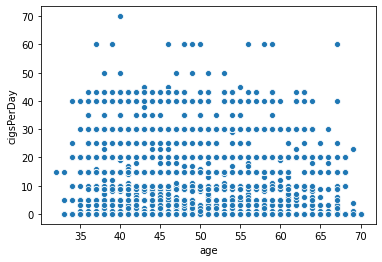

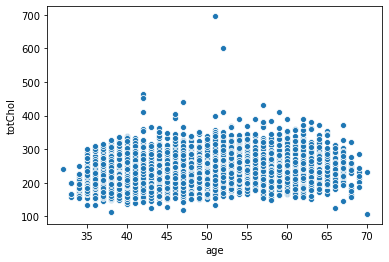

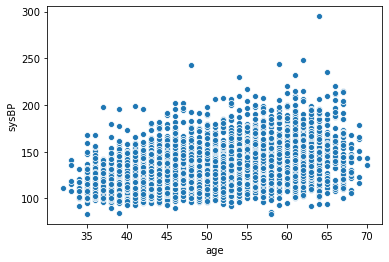

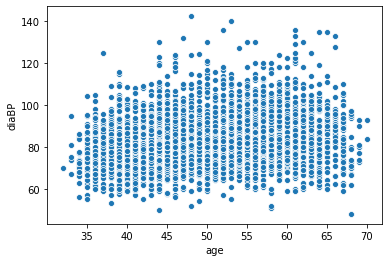

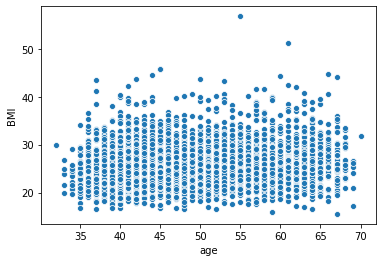

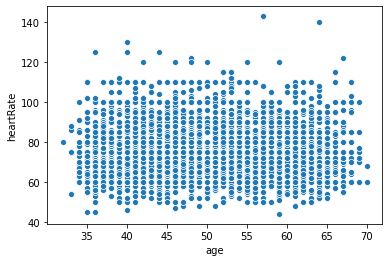

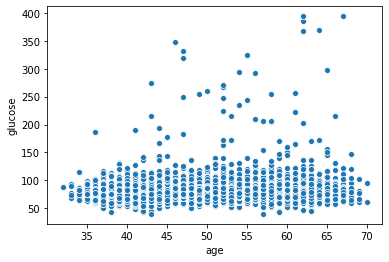

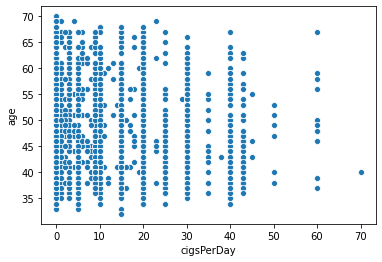

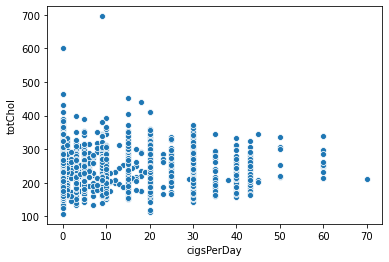

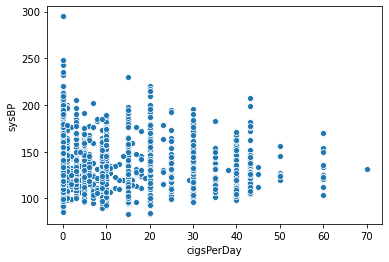

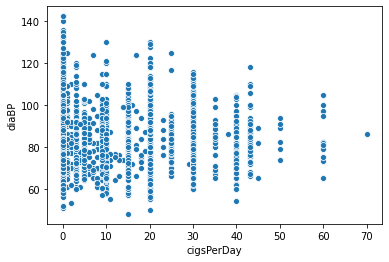

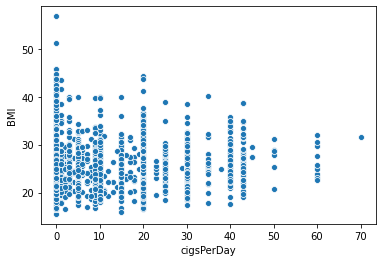

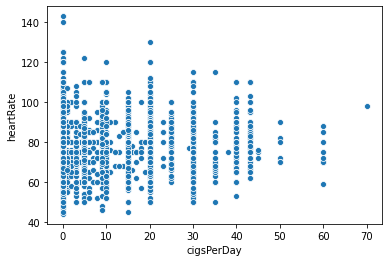

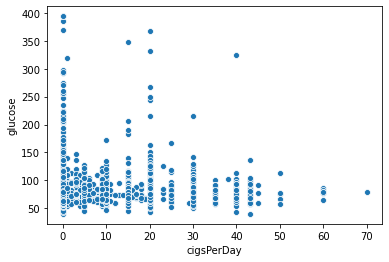

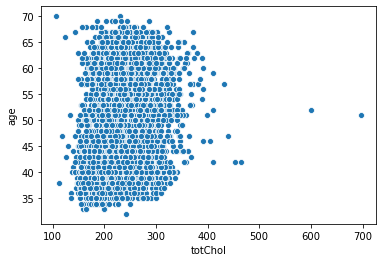

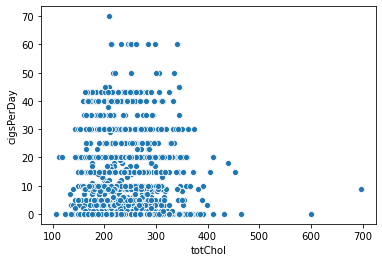

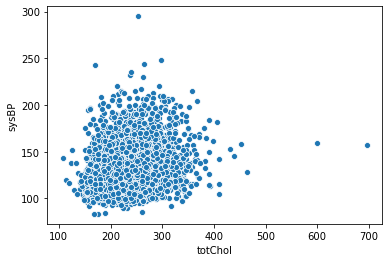

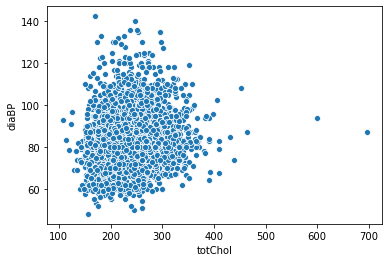

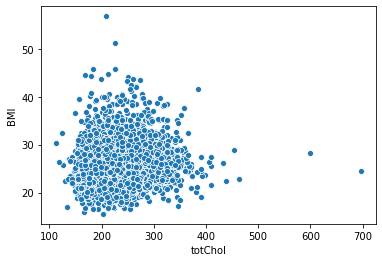

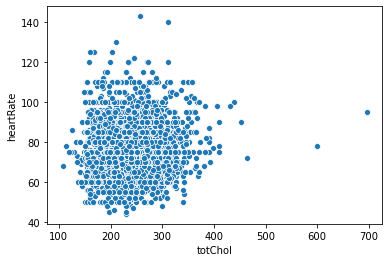

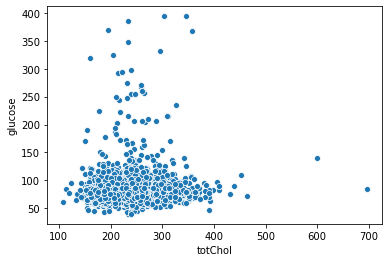

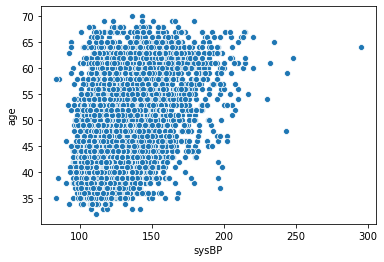

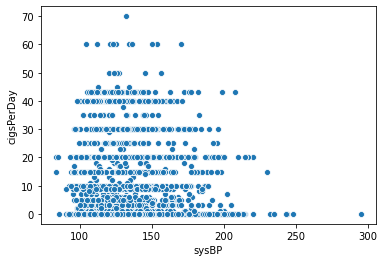

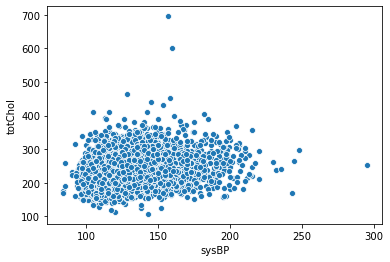

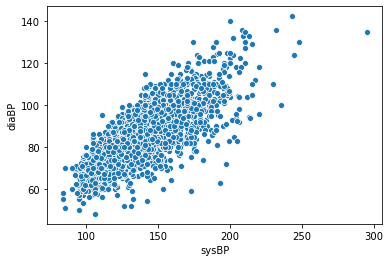

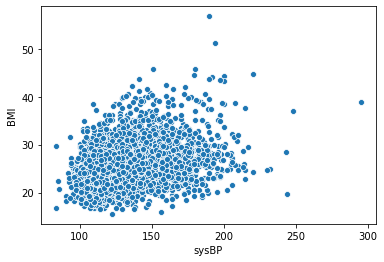

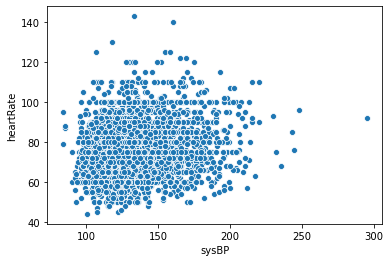

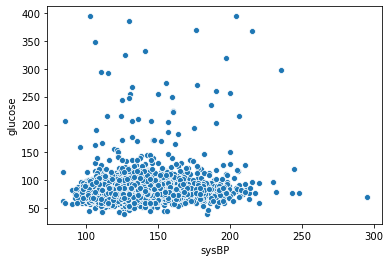

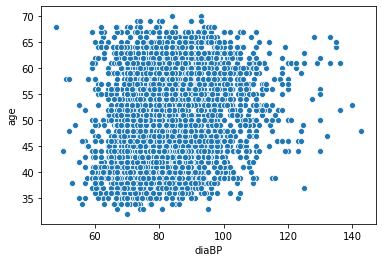

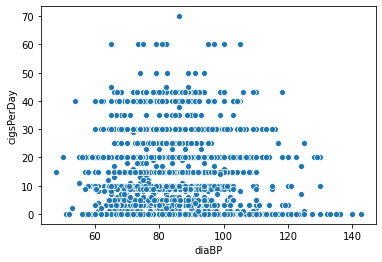

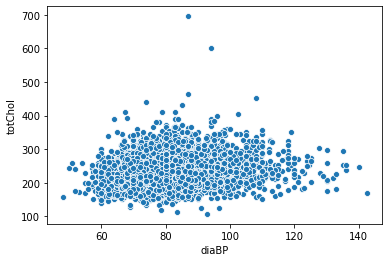

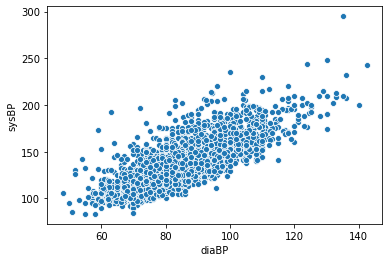

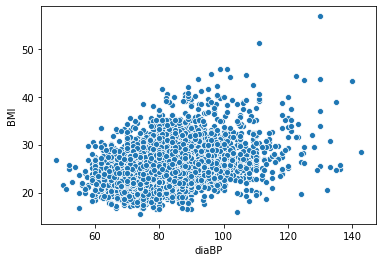

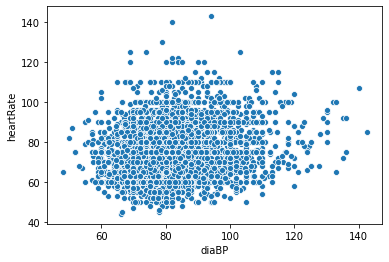

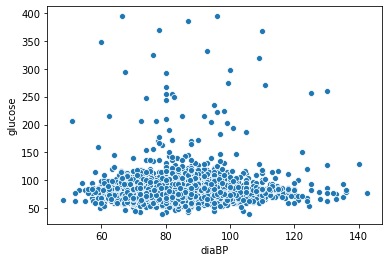

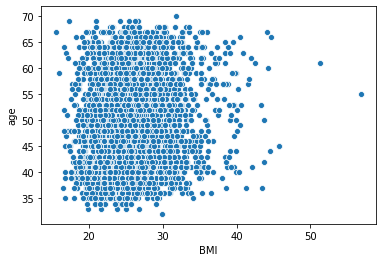

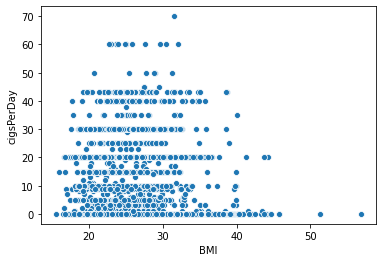

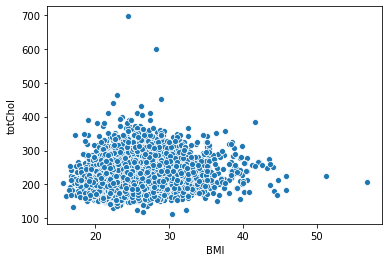

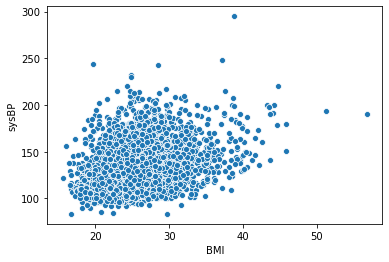

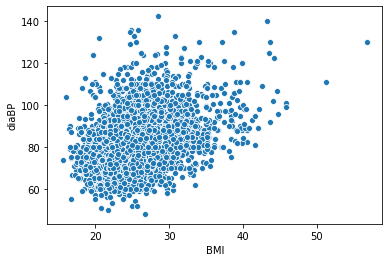

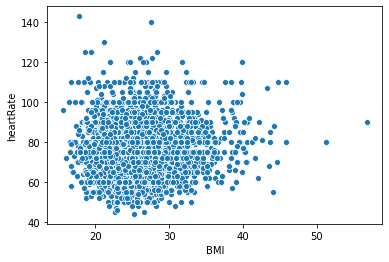

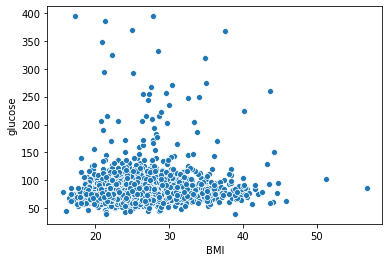

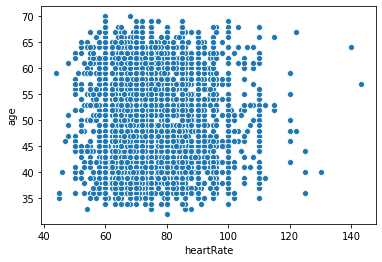

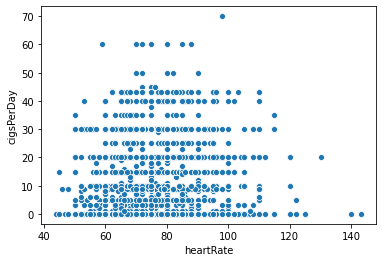

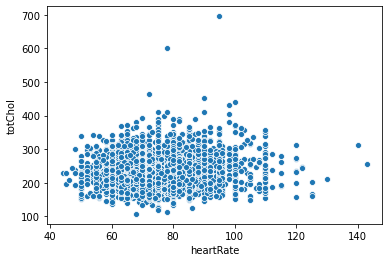

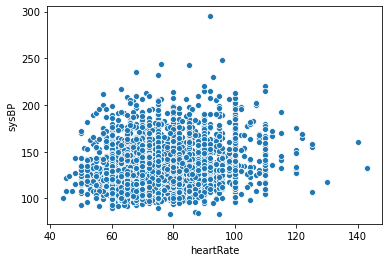

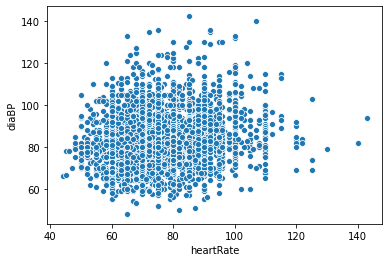

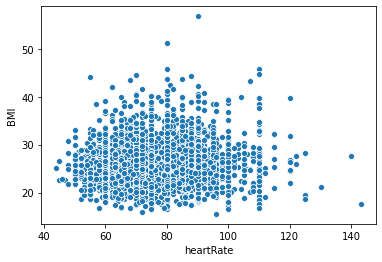

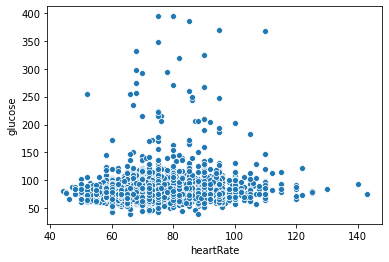

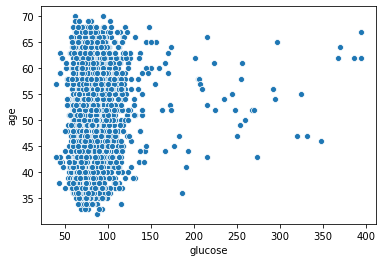

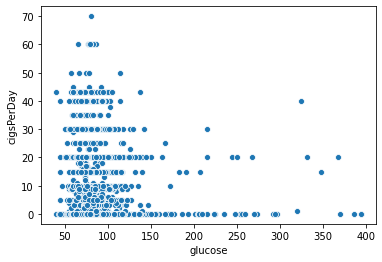

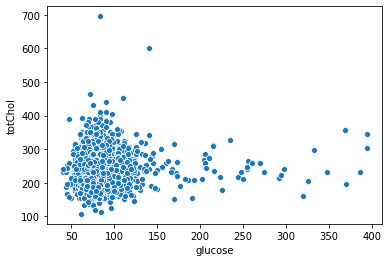

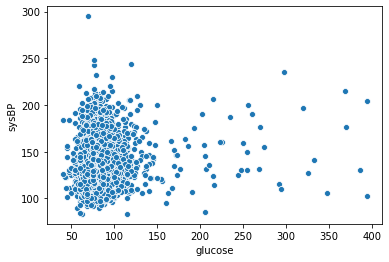

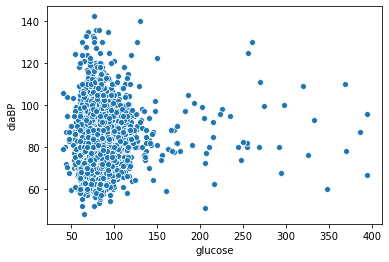

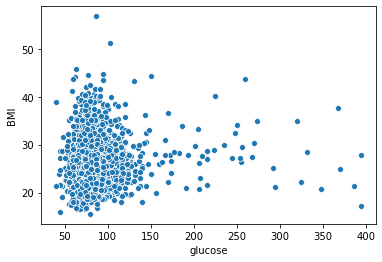

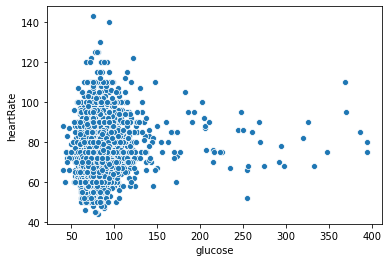

In [4]:
#Plotting all combinations
graphs = []
# remove the CHD column for comparisons
temp_df = df.drop(['CHD'], axis=1)
for x in temp_df:
    for y in temp_df:
        # Remove comparing it to itself (1)
        if x != y:
            plt.figure()
            seaborn.scatterplot(x=x,y=y,data=df)

After the calculation and graphs above, the best correlated attributes are:  
cigPerDay <- Age,  
totChol <- Age,  
BMI <- diaBP,  
heartRate <- sysBP,  
glucose <- sysBP  
We then fill in the missing values with our estimates:

In [5]:
## cigsPerDay
temp_df = df[df['cigsPerDay'].notna()]
x = temp_df["age"]
x = sm.add_constant(x)
y = temp_df["cigsPerDay"]

model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             cigsPerDay   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     162.4
Date:                Tue, 07 Jul 2020   Prob (F-statistic):           1.59e-36
Time:                        19:31:37   Log-Likelihood:                -16323.
No. Observations:                4209   AIC:                         3.265e+04
Df Residuals:                    4207   BIC:                         3.266e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.2803      1.057     21.072      0.000      20.207      24.353
age           -0.2678      0.021    -12.744      0.000      -0.309      -0.227
==============================================================================
Omnibus:                      785.277   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1322.127
Skew:                           1.236   Prob(JB):                    8.01e-288
Kurtosis:                       4.194   Cond. No.                         295.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
## totChol
temp_df = df[df['totChol'].notna()]
x = temp_df["age"]
x = sm.add_constant(x)
y = temp_df["totChol"]

model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                totChol   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     308.9
Date:                Tue, 07 Jul 2020   Prob (F-statistic):           9.19e-67
Time:                        19:31:37   Log-Likelihood:                -21697.
No. Observations:                4188   AIC:                         4.340e+04
Df Residuals:                    4186   BIC:                         4.341e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        169.0609      3.907     43.271      0.000     161.401     176.721
age            1.3652      0.078     17.574      0.000       1.213       1.517
==============================================================================
Omnibus:                      909.943   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4685.659
Skew:                           0.944   Prob(JB):                         0.00
Kurtosis:                       7.825   Cond. No.                         296.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
## BMI
temp_df = df[df['BMI'].notna()]
x = temp_df["diaBP"]
x = sm.add_constant(x)
y = temp_df["BMI"]

model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BMI   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     701.2
Date:                Tue, 07 Jul 2020   Prob (F-statistic):          4.56e-143
Time:                        19:31:37   Log-Likelihood:                -11594.
No. Observations:                4219   AIC:                         2.319e+04
Df Residuals:                    4217   BIC:                         2.320e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.0733      0.409     36.826      0.000      14.271      15.876
diaBP          0.1294      0.005     26.480      0.000       0.120       0.139
==============================================================================
Omnibus:                      525.294   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1094.179
Skew:                           0.767   Prob(JB):                    2.52e-238
Kurtosis:                       4.968   Cond. No.                         589.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
## heartRate
temp_df = df[df['heartRate'].notna()]
x = temp_df["sysBP"]
x = sm.add_constant(x)
y = temp_df["heartRate"]

model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              heartRate   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     145.5
Date:                Tue, 07 Jul 2020   Prob (F-statistic):           5.79e-33
Time:                        19:31:37   Log-Likelihood:                -16478.
No. Observations:                4237   AIC:                         3.296e+04
Df Residuals:                    4235   BIC:                         3.297e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.7132      1.107     56.676      0.000      60.544      64.883
sysBP          0.0995      0.008     12.062      0.000       0.083       0.116
==============================================================================
Omnibus:                      287.739   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              388.903
Skew:                           0.598   Prob(JB):                     3.55e-85
Kurtosis:                       3.878   Cond. No.                         817.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
## glucose
temp_df = df[df['glucose'].notna()]
x = temp_df["sysBP"]
x = sm.add_constant(x)
y = temp_df["glucose"]

model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                glucose   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     77.63
Date:                Tue, 07 Jul 2020   Prob (F-statistic):           1.85e-18
Time:                        19:31:37   Log-Likelihood:                -17653.
No. Observations:                3850   AIC:                         3.531e+04
Df Residuals:                    3848   BIC:                         3.532e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.8044      2.320     26.638      0.000      57.256      66.353
sysBP          0.1522      0.017      8.811      0.000       0.118       0.186
==============================================================================
Omnibus:                     4515.241   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           560136.877
Skew:                           6.113   Prob(JB):                         0.00
Kurtosis:                      60.812   Cond. No.                         815.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the simple linear regressions above we can get the following equations for the missing values:  
cigsPerDay = 22.2803 - 0.2678(age)  
totChol = 169.0609 + 1.3652(age)  
BMI = 15.0733 + 0.1294(diaBP)  
heartRate = 62.7312 + 0.0775(sysBP)
glucose = 61.8044 + 0.1522(sysBP)  
Filling in the missing values with those equations:

In [10]:
# cigsPerDay
df['cigsPerDay'] = df.apply(
    lambda row: 22.2803 - (0.2678*row['age']) if np.isnan(row['cigsPerDay']) else row['cigsPerDay'],
    axis=1
)

In [11]:
# totChol
df['totChol'] = df.apply(
    lambda row: 169.0609 + (1.365*row['age']) if np.isnan(row['totChol']) else row['totChol'],
    axis=1
)

In [12]:
# BMI
df['BMI'] = df.apply(
    lambda row: 15.0733 + (0.1294*row['diaBP']) if np.isnan(row['BMI']) else row['BMI'],
    axis=1
)

In [13]:
# heartRate
df['heartRate'] = df.apply(
    lambda row: 15.0733 + (0.1294*row['sysBP']) if np.isnan(row['heartRate']) else row['heartRate'],
    axis=1
)

In [14]:
# glucose
df['glucose'] = df.apply(
    lambda row: 61.8044 + (0.1522*row['sysBP']) if np.isnan(row['glucose']) else row['glucose'],
    axis=1
)
df.isnull().sum(axis = 0)

age           0
cigsPerDay    0
totChol       0
sysBP         0
diaBP         0
BMI           0
heartRate     0
glucose       0
CHD           0
dtype: int64

### Exploratory Data Analysis:
The data is split into a training and testing set with an 80/20 split. Seed = 8675309 (Jenny's Number)

In [15]:
X = df.drop(['CHD'], axis=1)
Y = df[['CHD']]
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, train_size = 0.80, random_state = 8675309)

In [16]:
# Training k=3
model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_Train, Y_Train['CHD'])
y_pred = model.predict(X_Test)
pred = pd.DataFrame(y_pred, )
pred.rename(columns = {0:"Pred"}, inplace = True)
results = pd.concat([pred, Y_Test.reset_index(drop=True)], axis = 1)
x = confusion_matrix(results['CHD'], results["Pred"])
y = accuracy_score(results['CHD'], results["Pred"])
print("Matrix: ")
print(x)
print("Accuracy: ", y)
print("Error_rate:", 1 - y)

Matrix: 
[[665  45]
 [123  15]]
Accuracy:  0.8018867924528302
Error_rate: 0.19811320754716977


In [17]:
# Training k=5
model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_Train, Y_Train['CHD'])
y_pred = model.predict(X_Test)
pred = pd.DataFrame(y_pred, )
pred.rename(columns = {0:"Pred"}, inplace = True)
results = pd.concat([pred, Y_Test.reset_index(drop=True)], axis = 1)
x = confusion_matrix(results['CHD'], results["Pred"])
y = accuracy_score(results['CHD'], results["Pred"])
print("Matrix: ")
print(x)
print("Accuracy: ", y)
print("Error_rate:", 1 - y)

Matrix: 
[[676  34]
 [125  13]]
Accuracy:  0.8125
Error_rate: 0.1875


In [18]:
# Training k=7
model = KNeighborsClassifier(n_neighbors=7)

model.fit(X_Train, Y_Train['CHD'])
y_pred = model.predict(X_Test)
pred = pd.DataFrame(y_pred, )
pred.rename(columns = {0:"Pred"}, inplace = True)
results = pd.concat([pred, Y_Test.reset_index(drop=True)], axis = 1)
x = confusion_matrix(results['CHD'], results["Pred"])
y = accuracy_score(results['CHD'], results["Pred"])
print("Matrix: ")
print(x)
print("Accuracy: ", y)
print("Error_rate:", 1 - y)

Matrix: 
[[687  23]
 [128  10]]
Accuracy:  0.8219339622641509
Error_rate: 0.17806603773584906


### Evaluation:
Comparing the error rates of the 3 k-values, the highest k that was tested, k=7, had the highest accuracy rate, leading to the lowest error rate, making it the best overall option for predicting the CHD diagnosis. Although the other 2 models using lower k's never fell below 0.8 accuracy, they still were worse than k=7. My suggestion to the client would be KNeighbors k = 7 for the highest chance of being right overall.

### Results:
Using k=7 or higher would yield the best results for the tests, and it would be smart to not rely on the glucose to predict the CHD, as alot of those data points themselves were predicted, which could lead to the data become skewed and becoming less accurate. Further testing could reveal a better k value which would raise the accuracy, more than likely that k-value would be larger than 7.

### Reference:
SeanLaw (2015). Convert a Pandas DataFrame to Numeric. Retrieved (2020, July 7) from http://seanlaw.github.io/2015/12/15/convert-pandas-dataframe-to-numeric/  
Pandas Documentation (2014). pandas.DataFrame.drop. Retrieved (2020, July 7) from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html  
Stack Exchange (2019). How to fill missing value based on othercolumns in Pandas dataframe?. Retrieved (2020, July 7) from https://datascience.stackexchange.com/questions/17769/how-to-fill-missing-value-based-on-other-columns-in-pandas-dataframe  
Stack Overflow (2020). How to count the NaN values in a column in pandas DataFrame. Retrieved (2020, July 7) from https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe  
